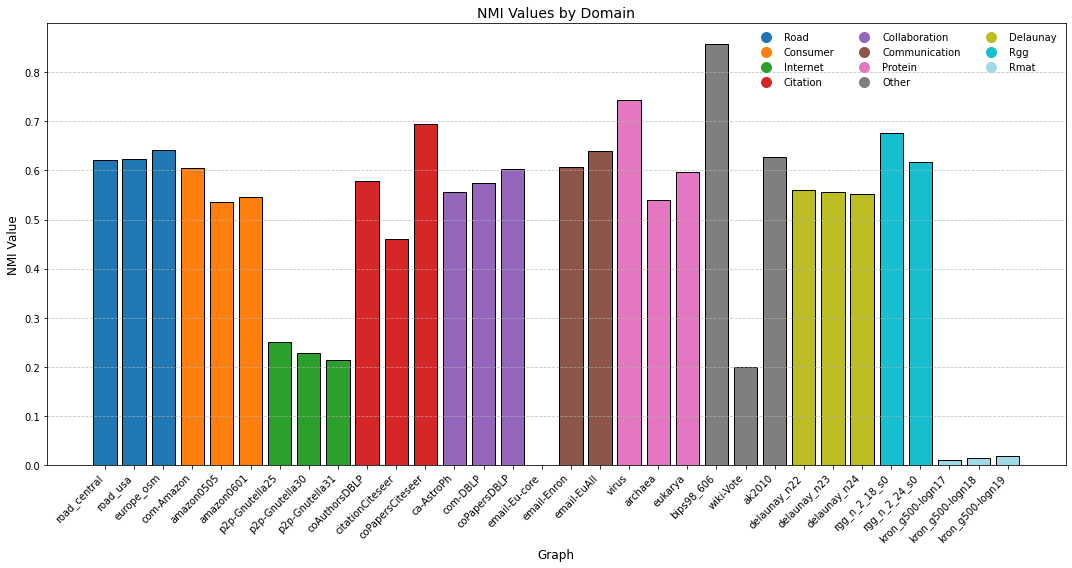

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# Load data from CSV file
file_path = 'nmi_values.csv'  # Replace with your actual file path
df = pd.read_csv(file_path)

# Drop rows with missing data
df = df.dropna(subset=["Edges", "NMI Value"])

# Custom domain order with capitalized names
custom_domain_order = ["Road", "Consumer", "Internet", "Citation", "Collaboration", 
                       "Communication", "Protein", "Other", "Delaunay", "Rgg", "Rmat"]

# Set 'Domain' as a categorical variable with the specified order and sort by 'Domain' and 'Edges'
df["Domain"] = pd.Categorical(df["Domain"], categories=custom_domain_order, ordered=True)
df = df.sort_values(by=["Domain", "Edges"])  # Sort first by the custom domain order, then by edges within each domain

# Generate colors for each domain
domains = df["Domain"].unique()
colors = cm.get_cmap("tab20", len(domains))(range(len(domains)))  # Generate distinct colors for each domain
domain_color_map = dict(zip(domains, colors))  # Map each domain to a specific color

# Plotting
plt.figure(figsize=(15, 8))

# Plot each graph by its domain color
bars = []
for graph, nmi_value, domain in zip(df["Graph"], df["NMI Value"], df["Domain"]):
    bar = plt.bar(graph, nmi_value, color=domain_color_map[domain], edgecolor="black")
    bars.append(bar)

# Adjust x-ticks for better readability and add labels, title
plt.xticks(rotation=45, ha="right", fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel("Graph", fontsize=12)
plt.ylabel("NMI Value", fontsize=12)
plt.title("NMI Values by Domain", fontsize=14)
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Legend inside the plot, top right corner: no title, 3 columns
legend_labels = [plt.Line2D([0], [0], color=domain_color_map[domain], marker='o', linestyle='', markersize=10) for domain in domains]
plt.legend(legend_labels, domains, loc="upper right", ncol=3, frameon=False)

# Adjust layout for better spacing
plt.tight_layout()

# Save as PDF
plt.savefig("nmi_values_chart_by_custom_domain_order.pdf", format="pdf", bbox_inches="tight")

plt.show()
